In [2]:
from __future__ import print_function
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pyemma
import pandas as pd
# import some functions which should not clutter the notebook
# import shortcuts
import glob
# figure size parameters
pw = 6
ph = 0.75 * pw

In [165]:
a.query("xbias != 'step'").convert_objects(convert_numeric=True).mean()

/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


num      3.500000e+07
xbias    5.691262e+01
xo       6.000000e+01
dtype: float64

In [190]:


debug_folder = "/Users/weilu/Research/server/nov_2017/06nov/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_extended/simulation/dis_60.0/"
dis_list = []
for i in range(12):
    a = pd.read_table(debug_folder+f"x.{i}.colvars.traj", sep="\s+", skiprows=1, names=["num", "xbias", "xo"])
    a = pd.to_numeric(a.query("xbias != 'step'")["xbias"])[1:]
    b = pd.read_csv(debug_folder+f"1/addforce.{i}.dat")[" Distance"].values
#     print(pd.Series(a-b).mean())
    dis_list.append(pd.Series(a-b).mean())
print(np.mean(dis_list))

0.105258867849


In [192]:
folder = "/Users/weilu/Research/server/nov_2017/06nov/next_gen_native_based_memb_3_rg_0.4_lipid_0.6_extended/simulation/"
all_folder = glob.glob(folder+"dis_*")

In [198]:
import re
numbers = re.compile(r'dis_(\d+)')

for sim in all_folder:
    num = numbers.findall(sim)[0]
    debug_folder = sim + "/"
    dis_list = []
    for i in range(12):
        a = pd.read_table(debug_folder+f"x.{i}.colvars.traj", sep="\s+", skiprows=1, names=["num", "xbias", "xo"])
        a = pd.to_numeric(a.query("xbias != 'step'")["xbias"])[1:]
        b = pd.read_csv(debug_folder+f"1/addforce.{i}.dat")[" Distance"].values
    #     print(pd.Series(a-b).mean())
        dis_list.append(pd.Series(a-b).mean())
    print(num, np.mean(dis_list))

84 0.127806745502
69 0.149772055831
105 0.0464895898862
165 0.131075132308
129 0.116696601691
72 0.158323333151
87 0.0924868756236
39 -0.0452110253974
111 0.0433998675817
54 0.0586197123804
132 0.0610349578731
144 0.112049405123
168 0.162480667068
120 0.112382970115
135 0.134369377691
159 0.146029749633
153 0.130058158277
30 -0.0692861196013
75 0.145967678427
45 0.0247714762682
117 0.127221997697
171 0.117783163307
96 0.106761602664
156 0.134744594318
126 0.119703013293
93 0.0971119712485
33 -0.0557887693285
114 0.10503864344
48 0.0391775229976
108 0.11998413524
180 0.138117856611
177 0.168695250598
123 0.0979528659692
36 -0.0585496062459
81 0.11483234633
60 0.105258867849
78 0.158220716421
66 0.146028210365
63 0.117626567986
162 0.157856743951
51 0.0511468588855
42 -0.00669211478122
150 0.149547495088
147 0.127895193018
90 0.117502407619
141 0.111821231841
102 0.10610230443
99 0.0456745910626
57 0.0979627820496
138 0.137782724627
174 0.155265357944


In [185]:
pd.Series(a-b).describe()

count    5000.000000
mean        0.076642
std         0.762847
min        -2.243082
25%        -0.453515
50%         0.076786
75%         0.621595
max         2.303581
Name: xbias, dtype: float64

In [184]:
b.shape

(5000,)

In [175]:
pd.to_numeric(a.query("xbias != 'step'")["xbias"]).describe()

count    5001.000000
mean       56.912616
std         8.062256
min        24.828423
25%        51.574898
50%        57.143107
75%        62.197922
max        84.474362
Name: xbias, dtype: float64

In [176]:
pd.read_csv(debug_folder+"1/addforce.0.dat").describe()

,Steps,Distance,AddedForce,Dis12,Dis34,Dis56
count,5.000000e+03,5000.000000,5000.0,5000.000000,5000.000000,5000.000000
mean,3.000200e+07,56.836007,0.0,5.459742,23.622728,27.753537
std,5.774080e+06,8.086343,0.0,14.627121,21.707643,20.758492
min,2.000400e+07,24.103491,0.0,-50.719137,-47.721876,-54.984446
25%,2.500300e+07,51.544933,0.0,-4.317181,9.607940,14.036674
50%,3.000200e+07,57.055020,0.0,6.657459,20.940567,31.282190
75%,3.500100e+07,62.239923,0.0,14.201830,39.314973,43.531547
max,4.000000e+07,84.272621,0.0,75.679957,85.292788,78.215097


In [28]:
from pyemma.thermo import estimate_multi_temperature as estimate_mt
>>> import numpy as np
>>> energy_trajs = [np.array([1.6, 1.4, 1.0, 1.0, 1.2, 1.0, 1.0]), np.array([0.8, 0.7, 0.5, 0.6, 0.7, 0.8, 0.7])]
>>> temp_trajs = [np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), np.array([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])]
>>> dtrajs = [np.array([0, 1, 2, 2, 2, 2, 2]), np.array([0, 1, 2, 2, 1, 0, 1])]
>>> tram = estimate_mt(energy_trajs, temp_trajs, dtrajs, energy_unit='kT', temp_unit='kT', estimator='tram', lag=1)
>>> tram.f 

A Jupyter Widget

A Jupyter Widget

array([ 2.90904828,  1.72075789,  0.2658659 ])

In [24]:
folder = "/Users/weilu/Research/davinci/nov_2017/13nov/all_data_folder/new_next_gen_native_based_memb_3_rg_0.4_lipid_0.6_extended/"

In [3]:
folder = "/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/"

In [4]:
folder_list = glob.glob(folder+"*.feather")

In [55]:
folder_list = sorted(folder_list)

['/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/dis100.0.feather',
 '/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/dis102.0.feather',
 '/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/dis104.0.feather',
 '/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/dis106.0.feather',
 '/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/dis108.0.feather',
 '/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/dis110.0.feather',
 '/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/dis112.0.feather',
 '/Users/weilu/Research/davinci/nov_2017/20nov/all_data_folder/no_sid

In [59]:
import re
numbers = re.compile(r'dis(\d+).0.feather')

data_list = []
adw_us_trajs = []
adw_us_umbrella_centers = []
temp_trajs = []
energy_trajs = []

for sim in folder_list:
    num = numbers.findall(sim)[0]
    tmp = pd.read_feather(sim).query("Temp == 'T3'").assign(Bias=num).query("Step > 2e7")
    if float(num) > 150:
        continue
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
    temps = list(dic.values())
    def convert(x):
        return dic[x]
    tmp["Temp"] = tmp["Temp"].apply(convert)
    temp_trajs.append(tmp["Temp"].values.reshape(-1,1))
    energy_trajs.append(tmp["TotalE"].values.reshape(-1,1))
    data_list.append(tmp)
    print(num, np.mean(tmp["Distance"].values), float(num) - np.mean(tmp["Distance"].values))
    adw_us_trajs.append(tmp["Distance"].values.reshape(-1,1))
    adw_us_umbrella_centers.append(float(num))
data = pd.concat(data_list)

/Users/weilu/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/weilu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


100 nan nan
102 nan nan
104 nan nan
106 nan nan
108 nan nan
110 105.585420327 4.41457967256
112 107.609876171 4.39012382926
114 109.499975377 4.50002462348
116 112.509075318 3.49092468231
118 113.390641192 4.60935880828
120 115.073658046 4.92634195426
122 nan nan
124 nan nan
126 121.573907617 4.42609238345
128 121.753522589 6.24647741147
130 nan nan
132 126.714836808 5.28516319162
134 130.450461706 3.54953829449
136 nan nan
138 nan nan
140 nan nan
30 27.2301889698 2.76981103017
32 28.2035756782 3.79642432182
34 29.9319770669 4.06802293307
36 33.6246994488 2.37530055117
38 31.2204526391 6.77954736086
40 36.7013786517 3.29862134828
42 37.7963457928 4.20365420721
44 37.9141940914 6.08580590861
46 42.33295593 3.66704407001
48 36.1508314331 11.8491685669
50 44.0498361843 5.95016381572
52 44.3906351445 7.60936485545
54 50.4464902632 3.55350973681
56 50.2277634705 5.77223652947
58 52.8452319448 5.15476805518
60 56.2377653325 3.76223466747
62 56.3954371158 5.60456288418
64 58.6002312966 5.3997

In [63]:
a = list(np.linspace(0.2,0.9,36))

In [ ]:
{:10.4f}

In [64]:
a[0]

0.20000000000000001

In [71]:
print(f"{a[0]:.1f}")

0.2


In [67]:
print("{}".format(a[0]))

0.2


In [61]:
np.linspace(0.8,1,2)

array([ 0.8,  1. ])

In [44]:
from pyemma.thermo import estimate_multi_temperature as estimate_mt
>>> import numpy as np
>>> energy_trajs = [np.array([1.6, 1.4, 1.0, 1.0, 1.2, 1.0, 1.0]), np.array([0.8, 0.7, 0.5, 0.6, 0.7, 0.8, 0.7])]
>>> temp_trajs = [np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), np.array([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])]
>>> dtrajs = [np.array([0, 1, 2, 2, 2, 2, 2]), np.array([0, 1, 2, 2, 1, 0, 1])]
>>> tram = estimate_mt(energy_trajs, temp_trajs, dtrajs, energy_unit='kT', temp_unit='kT', estimator='tram', lag=1)
>>> tram.f 

A Jupyter Widget

A Jupyter Widget

array([ 2.90904828,  1.72075789,  0.2658659 ])

In [45]:
np.mean(tmp["Distance"].values)

123.34865373759386

In [46]:
adw_us_cluster = pyemma.coordinates.cluster_regspace(adw_us_trajs, max_centers=500, dmin=1)

In [47]:
n = len(adw_us_umbrella_centers)
adw_us_force_constants = [0.02]*n

In [48]:
adw_us_estimator = pyemma.thermo.estimate_umbrella_sampling(
    adw_us_trajs, adw_us_cluster.dtrajs, adw_us_umbrella_centers, adw_us_force_constants,
    maxiter=100000, maxerr=1.0E-13, save_convergence_info=50, estimator='wham')

A Jupyter Widget

A Jupyter Widget

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27c73400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114951390>], dtype=object)

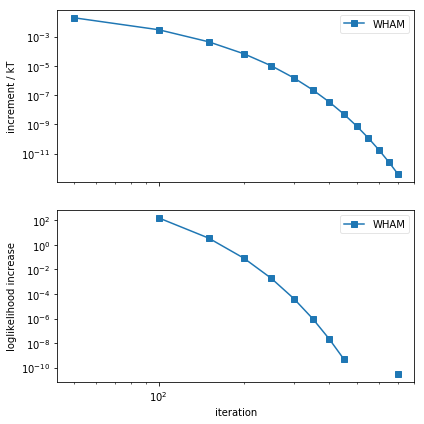

In [49]:
pyemma.plots.plot_convergence_info(adw_us_estimator)

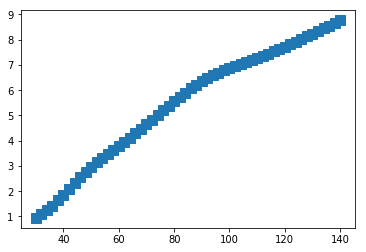

In [50]:
plt.plot(adw_us_estimator.umbrella_centers[:, 0], adw_us_estimator.f_therm, 's', markersize=10, label=adw_us_estimator.name)

In [18]:
tmp["Distance"].values.reshape(-1,1).shape

(5000, 1)

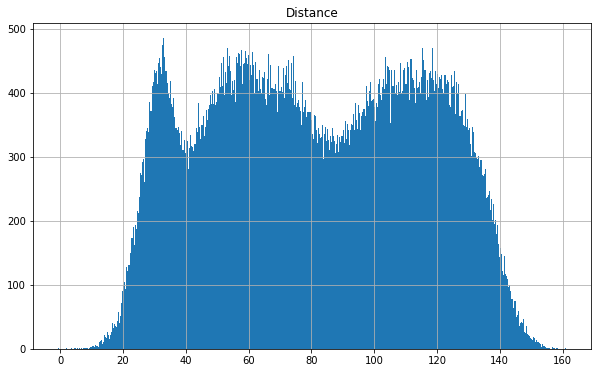

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
data.hist("Distance", ax=ax, bins=500)
plt.show()

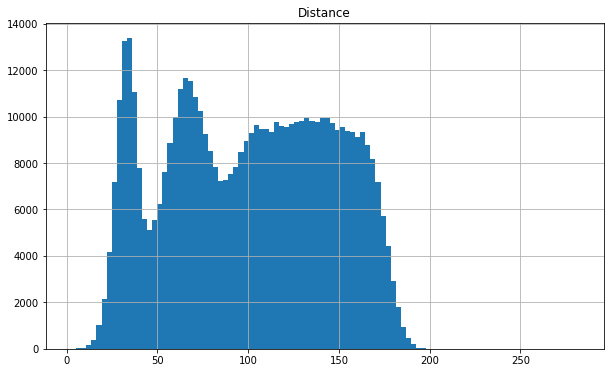

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
data.hist("Distance", ax=ax, bins=100)
plt.show()

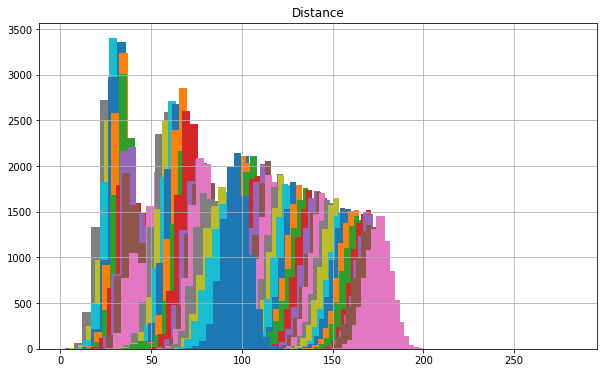

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
data.groupby("Bias").hist("Distance", ax=ax, bins=50)
plt.show()

In [37]:
import re
numbers = re.compile(r'dis(\d+).0.feather')
test = "dis102.0.feather"
numbers.findall(test)[0]

'102'

## Umbrella sampling simulations

The bias is computed via a harmonic potential based on the deviation of a frame from a reference structure. In the usual one-dimensional case, this reads

$$b^{(i)}(\mathbf{x}) = \frac{k^{(i)}}{2} \left\Vert \mathbf{x} - \mathbf{x}^{(i)} \right\Vert^2.$$

In the more general case, though, one can use a non-symmetric force matrix:

$$b^{(i)}(\mathbf{x}) = \frac{1}{2} \left\langle \mathbf{x} - \mathbf{x}^{(i)} \middle\vert \mathbf{k}^{(i)} \middle\vert \mathbf{x} - \mathbf{x}^{(i)} \right\rangle.$$

## API functions for umbrella sampling

For these simulation types, the `pyemma.thermo` module provides the API functions

```python
def estimate_umbrella_sampling(
    us_trajs, us_dtrajs, us_centers, us_force_constants,
    md_trajs=None, md_dtrajs=None, kT=None,
    maxiter=10000, maxerr=1.0E-15, save_convergence_info=0,
    estimator='wham', lag=1, dt_traj='1 step', init=None):
    ...

```

# Example Model 1: one-dimensional asymmetric double well potential

We start by looking at the stationary distribution and free energy profile which are available analytically.

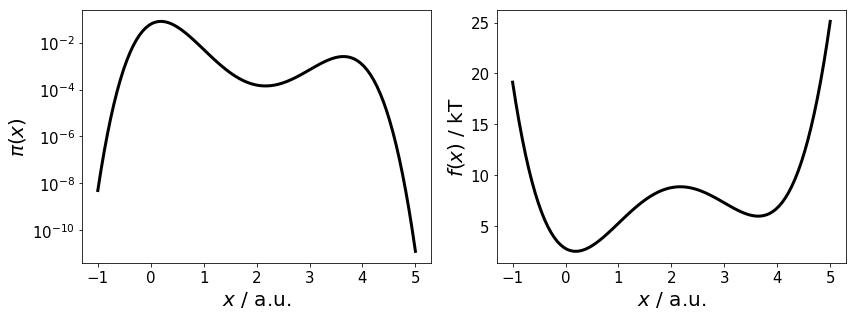

In [2]:
adw_x, adw_f, adw_pi = shortcuts.adw_reference(-1, 5, 100)

fig, ax = plt.subplots(1, 2, figsize=(2 * pw, ph))
ax[0].plot(adw_x, adw_pi, linewidth=3, color='black')
ax[0].set_ylabel(r"$\pi(x)$", fontsize=20)
ax[0].semilogy()
ax[1].plot(adw_x, adw_f, linewidth=3, color='black')
ax[1].set_ylabel(r"$f(x)$ / kT", fontsize=20)
for _ax in ax:
    _ax.set_xlabel(r"$x$ / a.u.", fontsize=20)
    _ax.tick_params(labelsize=15)
fig.tight_layout()

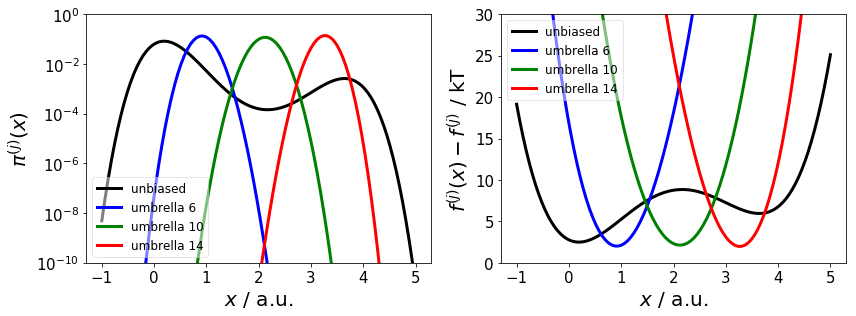

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(2 * pw, ph))
# plot the thermodynamic ground/unbiased state (kT=1.0)
ax[0].plot(adw_x, adw_pi, linewidth=3, color='black', label='unbiased')
ax[1].plot(adw_x, adw_f, linewidth=3, color='black', label='unbiased')
# plot the sixth umbrella
_, adw_f2, adw_pi2 = shortcuts.adw_reference(adw_x[0], adw_x[-1], adw_x.shape[0], k_bias=30.0, x_bias=1.07894737)
ax[0].plot(adw_x, adw_pi2, linewidth=3, color='blue', label='umbrella 6')
ax[1].plot(adw_x, adw_f2, linewidth=3, color='blue', label='umbrella 6')
# plot the 10th umbrella
_, adw_f2, adw_pi2 = shortcuts.adw_reference(adw_x[0], adw_x[-1], adw_x.shape[0], k_bias=30.0, x_bias=2.13157895)
ax[0].plot(adw_x, adw_pi2, linewidth=3, color='green', label='umbrella 10')
ax[1].plot(adw_x, adw_f2, linewidth=3, color='green', label='umbrella 10')
# plot the 14th umbrella
_, adw_f2, adw_pi2 = shortcuts.adw_reference(adw_x[0], adw_x[-1], adw_x.shape[0], k_bias=30.0, x_bias=3.18421053)
ax[0].plot(adw_x, adw_pi2, linewidth=3, color='red', label='umbrella 14')
ax[1].plot(adw_x, adw_f2, linewidth=3, color='red', label='umbrella 14')
# finish the figure
ax[0].set_ylabel(r"$\pi^{(j)}(x)$", fontsize=20)
ax[0].semilogy()
ax[0].set_ylim([1.0E-10, 1.0])
ax[0].legend(loc=3, fontsize=12, fancybox=True, framealpha=0.5)
ax[1].set_ylabel(r"$f^{(j)}(x) - f^{(j)}$ / kT", fontsize=20)
ax[1].set_ylim([0.0, 30.0])
ax[1].legend(loc=2, fontsize=12, fancybox=True, framealpha=0.5)
for _ax in ax:
    _ax.set_xlabel(r"$x$ / a.u.", fontsize=20)
    _ax.tick_params(labelsize=15)
fig.tight_layout()


First step: import the data from 100 precomputed umbrella sampling trajectories as listed in the file ``meta.dat``...

In [4]:
_adw_us_data_path = "data/asymmetric_double_well/umbrella_sampling/"
_adw_us_meta = np.loadtxt(_adw_us_data_path + "meta.dat")
adw_us_trajs = [np.load(_adw_us_data_path + "us_traj_%03d.npy" % int(i)) for i in _adw_us_meta[:, 0]]
adw_us_umbrella_centers = list(_adw_us_meta[:, 1])
adw_us_force_constants = list(_adw_us_meta[:, 2])

In [6]:
type(adw_us_trajs)

list

In [7]:
len(adw_us_trajs)

100

In [8]:
adw_us_trajs[0].size

1001

In [9]:
print(len(adw_us_trajs))
print(len(adw_us_umbrella_centers))
print(len(adw_us_force_constants))

100
100
100


Text(0,0.5,'x')

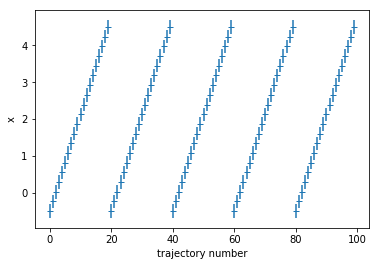

In [5]:
plt.errorbar(np.arange(len(adw_us_umbrella_centers)), adw_us_umbrella_centers, yerr=1.0/np.array(adw_us_force_constants)**0.5, fmt='_')
plt.xlabel('trajectory number')
plt.ylabel('x')

In [37]:
import glob

In [11]:
print('order parameter trajectory shape', adw_us_trajs[0].shape)

order parameter trajectory shape (1001, 1)


In [12]:
location = "/Users/weilu/Research/server/jul_2017/pulling/free_energy/k_0.1/simulation/dis_169.69696969696972/0/"

In [13]:
file = location + "data"

In [30]:
type(adw_us_trajs[0])

numpy.ndarray

In [15]:
my_umbrella_centers = [i for i in np.linspace(0, 400, 100)]
my_force_constants = [0.1]*100

In [121]:
f = "/Users/weilu/Research/server/jul_2017/pulling/free_energy/k_0.1/simulation/dis_"

In [125]:
umbrella_list = glob.glob("/Users/weilu/Research/server/jul_2017/pulling/free_energy/k_0.1/simulation/dis_*")

In [16]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [17]:
umbrella_list = sorted(umbrella_list, key=numericalSort)

NameError: name 'umbrella_list' is not defined

In [18]:
myTrajs = []
myEnergys = []
for location in umbrella_list:
    file = location + "/0/data"
    tmp = np.loadtxt(file)[:,0].reshape(600,1).copy()
    myEnergys.append(tmp)
    tmp = np.loadtxt(file)[:,1].reshape(600,1).copy()
    myTrajs.append(tmp)

NameError: name 'umbrella_list' is not defined

Text(0.5,0,'x')

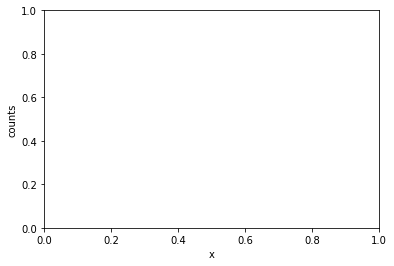

In [11]:
for t in myTrajs:
    plt.hist(t)
plt.ylabel('counts')
plt.xlabel('x')

In [159]:
myTrajs[0].flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [157]:
myTrajs[0].copy().flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [78]:
len(adw_us_umbrella_centers)

100

In [19]:
myCluster = pyemma.coordinates.cluster_regspace(myTrajs, max_centers=500, dmin=10)

In [20]:
myEstimator = pyemma.thermo.estimate_umbrella_sampling(
    myTrajs, myCluster.dtrajs, my_umbrella_centers, my_force_constants,
    maxiter=1000000, maxerr=1.0E-15, save_convergence_info=50, estimator='wham')

ValueError: Could not convert "centers" to two-dimensional C-contiguous behaved ndarray of float (32).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1225e46d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1227d0d30>], dtype=object)

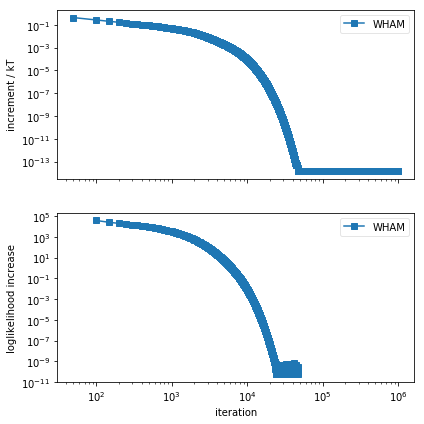

In [166]:
pyemma.plots.plot_convergence_info(myEstimator)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

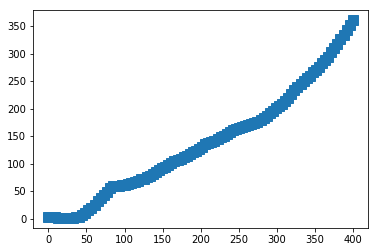

In [167]:
plt.plot(myEstimator.umbrella_centers[:, 0], myEstimator.f_therm, 's', markersize=10, label=adw_us_estimator.name)
plt.set_xlabel(r"umbrella_center", fontsize=20)
plt.set_ylabel(r"f_therm / kT", fontsize=20)

Plot 1-D histograms of the trajectories.

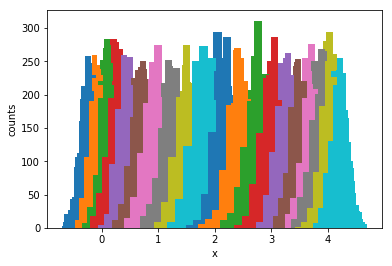

In [15]:
for t in adw_us_trajs:
    plt.hist(t)
plt.ylabel('counts')
plt.xlabel('x')

Second step: run a clustering algorithm on the configuration trajectories to define the bins
(and to compute the bin counts later on).

In [107]:
adw_us_cluster = pyemma.coordinates.cluster_regspace(adw_us_trajs, max_centers=500, dmin=0.2)

In [108]:
?pyemma.coordinates.cluster_regspace

Third step: run ``WHAM``  estimations using the ``estimate_umbrella_sampling`` API function and plot the convergence info...

In [109]:
adw_us_estimator = pyemma.thermo.estimate_umbrella_sampling(
    adw_us_trajs, adw_us_cluster.dtrajs, adw_us_umbrella_centers, adw_us_force_constants,
    maxiter=100000, maxerr=1.0E-15, save_convergence_info=50, estimator='wham')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f182f98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11f9007f0>], dtype=object)

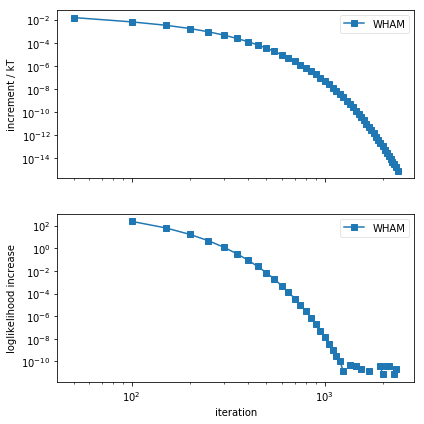

In [110]:
pyemma.plots.plot_convergence_info(adw_us_estimator)

Fourth step: plot the free energies ``f`` and ``f_therm``...

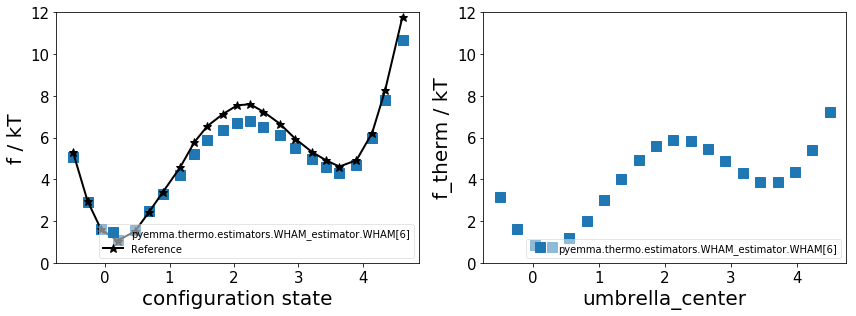

In [20]:
adw_us_x, adw_us_f = shortcuts.adw_match_reference_to_binning(adw_us_trajs, adw_us_cluster.clustercenters)

fig, ax = plt.subplots(1, 2, figsize=(2 * pw, ph))
ax[0].plot(
    adw_us_cluster.clustercenters[adw_us_estimator.active_set, 0], adw_us_estimator.f, 's', markersize=10, label=adw_us_estimator.name)
ax[0].plot(adw_us_x, adw_us_f, '-*', linewidth=2, markersize=9, color='black', label='Reference')
ax[0].set_xlabel(r"configuration state", fontsize=20)
ax[0].set_ylabel(r"f / kT", fontsize=20)
ax[1].plot(adw_us_estimator.umbrella_centers[:, 0], adw_us_estimator.f_therm, 's', markersize=10, label=adw_us_estimator.name)
ax[1].set_xlabel(r"umbrella_center", fontsize=20)
ax[1].set_ylabel(r"f_therm / kT", fontsize=20)
for _ax in ax:
    _ax.tick_params(labelsize=15)
    _ax.set_ylim([0, 12])
    _ax.legend(loc=4, fontsize=10, fancybox=True, framealpha=0.5)
fig.tight_layout()

# Mixed simulations data: US simulations + unbiased simulations

In [21]:
# load unbiased data
adw_md_trajs = [np.load(_adw_us_data_path + "md_traj_%03d.npy" % i) for i in range(5)]

# redo clustering with both, biased and unbiased data
adw_us_cluster = pyemma.coordinates.cluster_regspace(adw_us_trajs + adw_md_trajs, max_centers=500, dmin=0.2)

# split dtrajs into biased and unbiased
adw_us_dtrajs = adw_us_cluster.dtrajs[:len(adw_us_trajs)]
adw_md_dtrajs = adw_us_cluster.dtrajs[len(adw_us_trajs):]

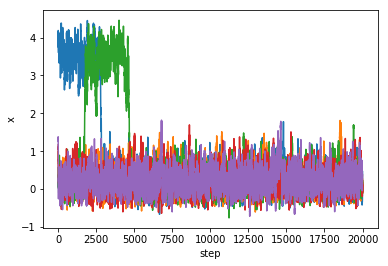

In [22]:
# plot order parameter trajectories of the unbiased simulations
for t in adw_md_trajs:
    plt.plot(t)
plt.ylabel('x')
plt.xlabel('step')

In [23]:
# run the estimator again for a sequence of lag times
lags = [1, 2, 5, 7, 10, 15, 20, 30, 40, 50, 70, 100]

memms = pyemma.thermo.estimate_umbrella_sampling(
    adw_us_trajs, adw_us_dtrajs, adw_us_umbrella_centers, adw_us_force_constants,
    md_trajs=adw_md_trajs, md_dtrajs=adw_md_dtrajs,
    lag=lags,
    maxiter=100000, maxerr=1.0E-15, save_convergence_info=50, estimator='dtram')

In [24]:
# TRAM
#lags = [1, 10, 50]
#memms = pyemma.thermo.estimate_umbrella_sampling(
#    adw_us_trajs, adw_us_dtrajs, adw_us_umbrella_centers, adw_us_force_constants,
#    md_trajs=adw_md_trajs, md_dtrajs=adw_md_dtrajs,
#    lag=lags,
#    maxiter=100000, maxerr=1.0E-6, init_maxerr=1.0, save_convergence_info=50, estimator='tram', direct_space=True)

In [25]:
[ m.name for m in memms ]

['pyemma.thermo.estimators.DTRAM_estimator.DTRAM[8]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[9]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[10]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[11]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[12]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[13]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[14]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[15]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[16]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[17]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[18]',
 'pyemma.thermo.estimators.DTRAM_estimator.DTRAM[19]']

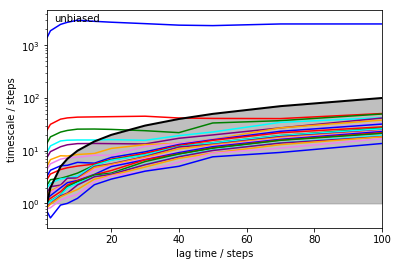

In [26]:
# plot implied time scales depending on lag time
pyemma.plots.plot_memm_implied_timescales(memms)

In [19]:
# at 10 steps the implied time scales look converged, pick that model for analysis
print(memms[4].lag)
dtram_estiamtor = memms[4]

10


In [20]:
# for TRAM
#print(memms[1].lag)
#dtram_estiamtor = memms[1]

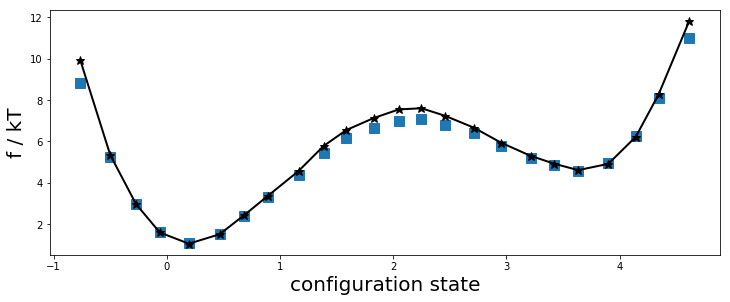

In [21]:
# plot estimate of the stationary distribution
adw_us_x, adw_us_f = shortcuts.adw_match_reference_to_binning(adw_us_trajs, adw_us_cluster.clustercenters)

plt.figure(figsize=(2 * pw, ph))
plt.plot(
    adw_us_cluster.clustercenters[dtram_estiamtor.active_set, 0], dtram_estiamtor.f, 's', markersize=10, label=dtram_estiamtor.name)
plt.plot(adw_us_x, adw_us_f, '-*', linewidth=2, markersize=9, color='black', label='Reference')
plt.xlabel(r"configuration state", fontsize=20)
plt.ylabel(r"f / kT", fontsize=20)

# PyEMMA's general thermo API

## binned estimators
The `pyemma.thermo` module provides the following API functions to perform ``dTRAM`` and ``WHAM`` estimations:

```python
def dtram(
    ttrajs, dtrajs, bias, lag,
    maxiter=10000, maxerr=1.0E-15, save_convergence_info=0,
    dt_traj='1 step', init=None):
    ...
    
def wham(
    ttrajs, dtrajs, bias,
    maxiter=100000, maxerr=1.0E-15, save_convergence_info=0,
    dt_traj='1 step'):
    ...
```

- ``ttrajs`` is a list of ``numpy.ndarray`` objects with ``shape=(T_i,)``, where ``T_i`` denotes the number of frames in trajectory ``i``. The entries indicate in which thermodynamic state each frame was created.
- ``dtrajs`` is a list of ``numpy.ndarray`` objects with ``shape=(T_i,)``, where ``T_i`` denotes the number of frames in trajectory ``i``. The entries indicate to which discrete configuration states each frame belongs.
- ``bias`` is a ``numpy.ndarray`` with ``shape=(K, N)``, where ``K`` is the number of thermodynamic states and ``N`` is the number of discrete configuration states. The elements are the dimensionless bias energies for all combinations of discrete configuration and thermodynamic states.
- ``lag`` is the lag time in steps at which transitions are counted.


## bin-less estimators

```python
def tram(
    ttrajs, dtrajs, bias, lag,
    maxiter=10000, maxerr=1.0E-15, save_convergence_info=0,
    dt_traj='1 step', init=None, direct_space=False):
    ...
    
def mbar(
    ttrajs, dtrajs, bias,
    maxiter=100000, maxerr=1.0E-15, save_convergence_info=0,
    dt_traj='1 step', direct_space=False):
    ...
```

The ``bias`` parameter of bin-less estimators has a different formet than for binned estimators:


- ``bias`` is a ``(numpy.ndarray(T, num_therm_states)``, or list of ``numpy.ndarray(T_i, num_therm_states))`` – A single reduced bias energy trajectory or a list of reduced bias energy trajectories. For every simulation frame seen in trajectory `i` and time step `t`, ``btrajs[i][t, k]`` is the reduced bias energy of that frame evaluated in the `k`’th thermodynamic state (i.e. at the `k`’th umbrella/Hamiltonian/temperature)

The parameter ``direct_space`` allows to optimize the calculation for speed.

- ``direct_space`` is an optional boolean parameter that is false by default. – Whether to perform the self-consitent iteration with Boltzmann factors (direct space) or free energies (log-space). Calculations in direct space are faster. When analyzing data from multi-temperature simulations, direct-space is not recommended.

To make the preparation of ``ttrajs`` and ``bias`` easier, we provide two further API functions to handle the preparation for certain types of simulations, i.e., multi-temperature and umbrella sampling with harmonic bias potentials.